In [2]:
import yt
import matplotlib.pyplot  as plt
import numpy as np

In [3]:
import matplotlib as mpl

jetcmap = plt.cm.get_cmap("jet", 9) #generate a jet map with 10 values "rainbow", "jet", YlOrRd
jet_vals = jetcmap(np.arange(9)) #extract those values as an array 
jet_vals[0] = [1.0, 1, 1.0, 1] #change the first value 
jet_vals[8] = [0.0, 0, 0.0, 1] #change the first value 
newcmap = mpl.colors.LinearSegmentedColormap.from_list("mine", jet_vals) 

plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=12)
plt.rc('legend', fontsize=10)

/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_19695/2096950246.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jetcmap = plt.cm.get_cmap("jet", 9) #generate a jet map with 10 values "rainbow", "jet", YlOrRd


In [31]:
filedir = [
            '/Users/yao/Desktop/job.78467/', # v4.8 
          ] 

filename = 'radslab_hdf5_chk_0010'  # check the mass fraction for the negative energy

In [32]:
def get_yt_data_1d(filename):
    j_idx = 0
    k_idx = 0
    fields_list = ["x", "dens", "tele", "tion", "trad",
                   "pres", "temp", "cham", "targ", "tar2",
                   "velx", "ye", 
                #    "magz"
                   ]

    data_yt = yt.load(filename)
    data_yt_map = data_yt.covering_grid(
        level=0, left_edge=[data_yt.domain_left_edge[0], 
                            data_yt.domain_left_edge[1], 
                            data_yt.domain_left_edge[2]
                            ], 
                            dims=data_yt.domain_dimensions
    )
    time_now = np.array(data_yt.current_time)*1e9
    xx = np.linspace(data_yt.domain_left_edge[0]*1e4, 
                     data_yt.domain_right_edge[0]*1e4,
                     data_yt.domain_dimensions[0])

    data_dict = {}
    for f in fields_list:
        data_dict[f] = data_yt_map[f][:,j_idx,k_idx]
    return data_dict, time_now, xx

In [33]:
data_dict, time_now, xx = get_yt_data_1d(filedir[0]+filename)

yt : [INFO     ] 2024-10-09 12:15:06,339 Particle file found: radslab_hdf5_chk_0010
yt : [INFO     ] 2024-10-09 12:15:06,359 Parameters: current_time              = 2.00024431822899e-10
yt : [INFO     ] 2024-10-09 12:15:06,360 Parameters: domain_dimensions         = [512   1   1]
yt : [INFO     ] 2024-10-09 12:15:06,360 Parameters: domain_left_edge          = [-0.0002  0.     -0.004 ]
yt : [INFO     ] 2024-10-09 12:15:06,360 Parameters: domain_right_edge         = [0.0002 0.032  0.004 ]
yt : [INFO     ] 2024-10-09 12:15:06,361 Parameters: cosmological_simulation   = 0


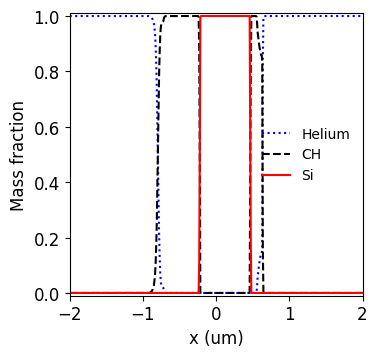

In [34]:
width  = 3.487 * 1.0
height = width #/ 1.618 * 0.8

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

ax.plot(xx, data_dict['cham'],':b',label='Helium')
ax.plot(xx, data_dict['targ'],'--k',label='CH')
ax.plot(xx, data_dict['tar2'],'-r',label='Si')
ax.set_xlabel(r'x (um)')
ax.set_xlim([-2,2])
ax.set_ylabel('Mass fraction')
ax.set_ylim([-0.01,1.01])
ax.legend(loc='best', numpoints=1, fancybox=False, fontsize=10, frameon=False)

fig.set_size_inches(width, height)


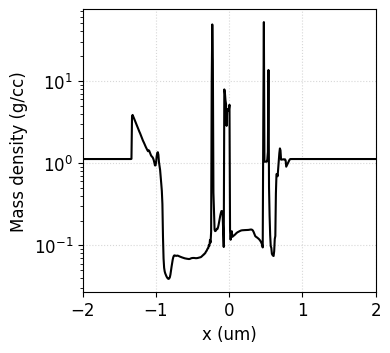

In [35]:
width  = 3.487 * 1.0
height = width #/ 1.618 * 0.8

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

ax.semilogy(xx, data_dict['dens'],'-k',label='density')
# ax.plot(xx, data_dict['targ'],'--k',label='CH')
# ax.plot(xx, data_dict['tar2'],'-r',label='Si')
ax.set_xlabel(r'x (um)')
ax.set_xlim([-2,2])
ax.set_ylabel('Mass density (g/cc)')
ax.grid(linestyle=':', alpha=0.5)
# ax.set_ylim([1e-3,3])
# ax.legend()

fig.set_size_inches(width, height)

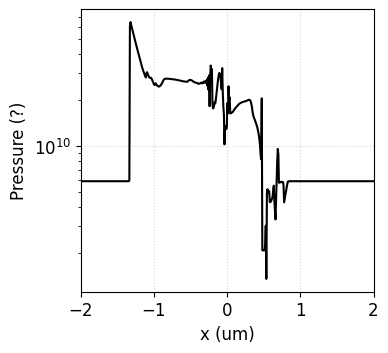

In [36]:
width  = 3.487 * 1.0
height = width #/ 1.618 * 0.8

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

ax.semilogy(xx, data_dict['pres'],'-k')
# ax.plot(xx, data_dict['targ'],'--k',label='CH')
# ax.plot(xx, data_dict['tar2'],'-r',label='Si')
ax.set_xlabel(r'x (um)')
ax.set_xlim([-2,2])
ax.set_ylabel('Pressure (?)')
ax.grid(linestyle=':', alpha=0.5)
# ax.set_ylim([1e6,1e10])
# ax.legend()

fig.set_size_inches(width, height)

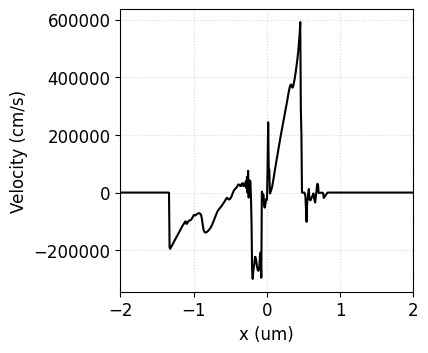

In [37]:
width  = 3.487 * 1.0
height = width #/ 1.618 * 0.8

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

ax.plot(xx, data_dict['velx'],'-k')
# ax.plot(xx, data_dict['targ'],'--k',label='CH')
# ax.plot(xx, data_dict['tar2'],'-r',label='Si')
ax.set_xlabel(r'x (um)')
ax.set_xlim([-2,2])
ax.set_ylabel('Velocity (cm/s)')
ax.grid(linestyle=':', alpha=0.5)
# ax.set_ylim([1e6,1e10])
# ax.legend()

fig.set_size_inches(width, height)